In [ ]:
# Load fashion_mnist dataset and split it into train and test set (keras.datasets.fashion_mnist).
from keras.datasets import fashion_mnist

In [ ]:
# 패션이미지를 가지고 와서 훈련, 테스트세트로 분리
from keras.datasets import fashion_mnist

# 데이터 로드
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

print(x_train.shape)  # (60000, 28, 28)
print(x_test.shape)   # (10000, 28, 28)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
(60000, 28, 28)
(10000, 28, 28)


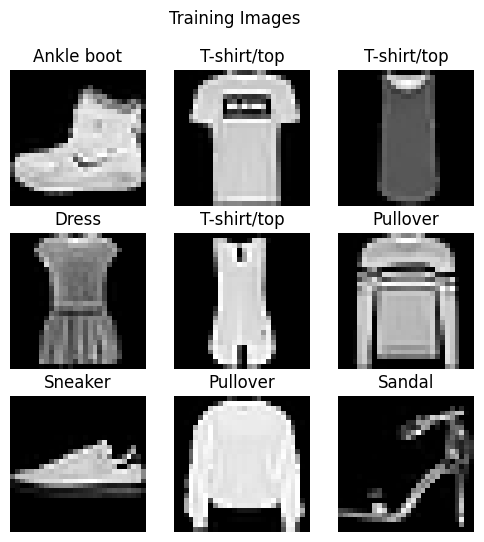

In [ ]:
# §Exploratory data analysis (imshow of 9 images of train and the 9 images of test, shape of train and test, and number of classes and names of classes). 데이터 탐색

class_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(class_names[y_train[i]])
    plt.axis('off')

plt.suptitle("Training Images")
plt.show()

In [ ]:
# 데이터 전처리(Data preprocessing)
# reshape
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [ ]:
# divided by 255 to normalize
x_train = x_train/255.0
x_test = x_test/255.0

In [ ]:
# 라벨 인코딩
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# 1 VGG BLOCK

In [ ]:
# 신경망 모델 구축
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

model = Sequential()
model.add(Conv2D(32, 3, activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110,474 (431.54 KB)

 Trainable params: 110,474 (431.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model. 컴파일 모델
# loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy’]
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Fit the model. 모델훈련
history = model.fit(x_train, y_train, batch_size=64, epochs=20, verbose=1)

Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 51s 52ms/step - accuracy: 0.6968 - loss: 0.8399
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 49s 52ms/step - accuracy: 0.8435 - loss: 0.4285
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 83s 52ms/step - accuracy: 0.8678 - loss: 0.3585
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 49s 52ms/step - accuracy: 0.8826 - loss: 0.3211
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 83s 53ms/step - accuracy: 0.8937 - loss: 0.2851
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 50s 53ms/step - accuracy: 0.9051 - loss: 0.2573
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 52ms/step - accuracy: 0.9095 - loss: 0.2394
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 52ms/step - accuracy: 0.9187 - loss: 0.2193
Epoch 9/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 47s 50ms/step - accuracy: 0.9262 - loss: 0.1983
Epoch 10/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 48s 52ms/step - accuracy: 0.9330 - loss: 0.1808
Epoch 11/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 52ms/step - accuracy: 0.9348 - loss: 0.1747
Epoch 12/20
938/938 ━━━━━━━━━━

In [ ]:
# 모델 저장
model.save('fashion_mnist.h5')

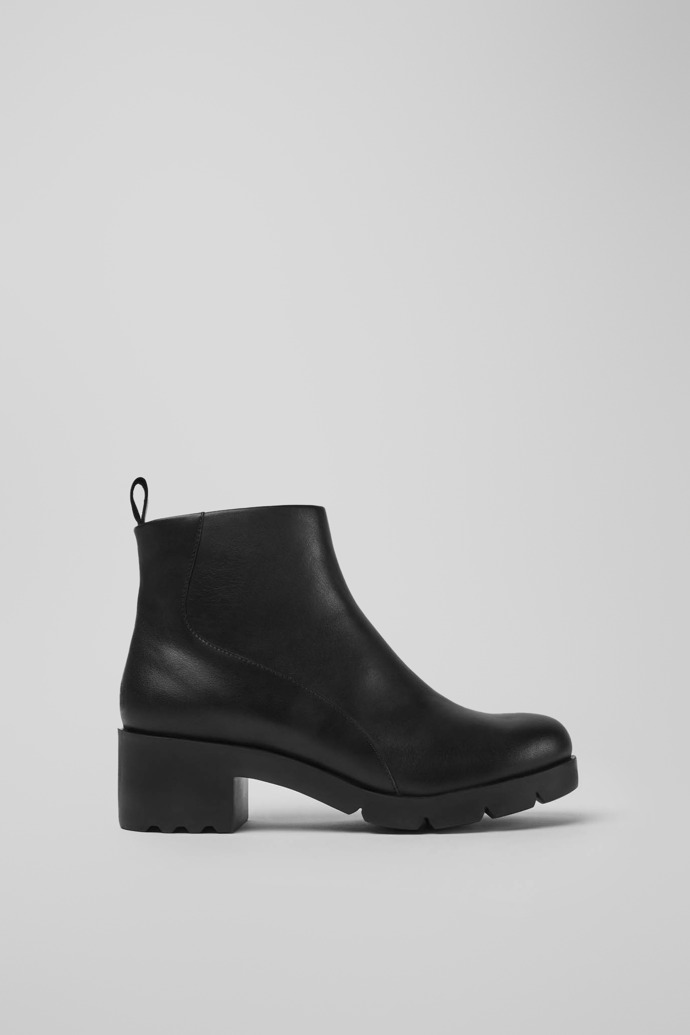

In [ ]:
# PIL로 이미지 파일 열기
from PIL import Image
img = Image.open('/content/ankleboot.jpg')
img

In [ ]:
# 타입 확인
type(img)

PIL.JpegImagePlugin.JpegImageFile

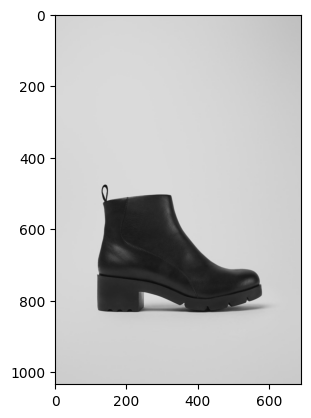

In [ ]:
# 이미지 파일 열기
import matplotlib.pyplot as plt
plt.imshow(img)

In [ ]:
# 이미지 사이즈 확인
print(img.size) #(width, height)
print(img.width, img.height)
# 이미지 포맷 확인
print(img.format) #JPG
# 이미지 모드 확인
print(img.mode) #RGB

(690, 1035)
690 1035
JPEG
RGB


In [ ]:
# 넘파이 배열로 변환
import numpy as np
np.array(img)

array([[[211, 211, 211],
        [211, 211, 211],
        [211, 211, 211],
        ...,
        [192, 192, 192],
        [192, 192, 192],
        [192, 192, 192]],

       [[211, 211, 211],
        [211, 211, 211],
        [211, 211, 211],
        ...,
        [192, 192, 192],
        [192, 192, 192],
        [192, 192, 192]],

       [[211, 211, 211],
        [211, 211, 211],
        [211, 211, 211],
        ...,
        [192, 192, 192],
        [192, 192, 192],
        [192, 192, 192]],

       ...,

       [[204, 204, 204],
        [204, 204, 204],
        [204, 204, 204],
        ...,
        [202, 202, 202],
        [202, 202, 202],
        [202, 202, 202]],

       [[204, 204, 204],
        [204, 204, 204],
        [204, 204, 204],
        ...,
        [202, 202, 202],
        [202, 202, 202],
        [202, 202, 202]],

       [[204, 204, 204],
        [204, 204, 204],
        [204, 204, 204],
        ...,
        [202, 202, 202],
        [202, 202, 202],
        [202, 202, 202]]

In [ ]:
# 흑백 이미지로 변환
img = img.convert('L')

In [ ]:
# 사이즈 확인
img.size

(690, 1035)

In [ ]:
# 이미지 자르기
img = img.crop((100, 400, 600, 900))

In [ ]:
# 사이즈 변환
img = img.resize((28,28))
img

In [ ]:
# 좌우반전
img = img.transpose(Image.FLIP_LEFT_RIGHT)
img

In [ ]:
# 배열변환
img = np.asarray(img)
img

array([[210, 210, 211, 212, 213, 213, 214, 214, 215, 215, 216, 216, 217,
        217, 217, 217, 218, 218, 218, 218, 218, 218, 218, 218, 217, 217,
        217, 217],
       [210, 210, 211, 212, 213, 213, 214, 214, 215, 215, 216, 216, 217,
        217, 217, 217, 218, 218, 218, 218, 218, 218, 218, 218, 217, 217,
        217, 216],
       [210, 210, 211, 212, 213, 213, 214, 214, 215, 215, 216, 216, 217,
        217, 217, 218, 218, 218, 218, 218, 218, 218, 218, 217, 217, 217,
        217, 216],
       [210, 210, 211, 212, 213, 213, 214, 214, 215, 215, 216, 216, 217,
        217, 217, 218, 218, 218, 218, 218, 218, 218, 218, 217, 217, 219,
        218, 216],
       [210, 211, 211, 212, 213, 213, 214, 215, 215, 215, 216, 216, 217,
        217, 217, 220, 222, 222, 221, 220, 219, 218, 217, 217, 219, 165,
        198, 218],
       [210, 211, 211, 212, 212, 213, 214, 214, 215, 215, 216, 216, 217,
        217, 218, 207, 189, 190, 197, 206, 215, 220, 223, 224, 224, 168,
        187, 219],
       [210, 211, 211, 212, 213, 213, 214, 215, 215, 216, 216, 216, 217,
        217, 222, 108,  55,  47,  49,  62,  79,  98, 113, 132, 157, 128,
        191, 219],
       [210, 211, 211, 212, 213, 214, 214, 215, 215, 215, 216, 216, 217,
        218, 212,  78,  60,  43,  39,  39,  40,  39,  30,  24,  25,  56,
        205, 218],
       [210, 211, 211, 212, 213, 214, 214, 215, 215, 216, 216, 217, 217,
        221, 188,  63,  60,  41,  39,  40,  39,  38,  33,  30,  28,  73,
        215, 217],
       [210, 211, 212, 212, 213, 213, 214, 215, 215, 216, 216, 217, 217,
        224, 138,  55,  52,  39,  37,  36,  35,  34,  32,  32,  28,  82,
        219, 217],
       [210, 211, 212, 212, 213, 214, 214, 215, 215, 216, 216, 217, 218,
        213,  79,  64,  45,  37,  36,  35,  34,  32,  31,  31,  28,  78,
        218, 217],
       [210, 211, 212, 212, 213, 214, 214, 215, 215, 216, 216, 217, 225,
        144,  53,  59,  39,  34,  33,  32,  32,  30,  28,  31,  31,  60,
        211, 218],
       [211, 211, 212, 213, 213, 214, 214, 215, 216, 216, 216, 223, 182,
         53,  48,  41,  35,  33,  31,  30,  29,  29,  30,  30,  31,  49,
        201, 220],
       [211, 211, 212, 213, 213, 214, 215, 215, 216, 216, 220, 202,  68,
         39,  41,  36,  34,  33,  33,  32,  30,  33,  34,  39,  46,  38,
        172, 223],
       [211, 211, 212, 213, 214, 214, 215, 215, 215, 220, 211,  87,  37,
         42,  36,  34,  33,  33,  32,  32,  33,  35,  51,  73,  59,  32,
        133, 225],
       [211, 211, 212, 213, 213, 214, 214, 215, 221, 206,  91,  32,  54,
         43,  34,  34,  34,  32,  29,  28,  31,  47,  64,  62,  61,  39,
         91, 221],
       [211, 211, 215, 218, 218, 219, 220, 218, 179,  78,  28,  40,  47,
         39,  33,  36,  34,  28,  27,  27,  31,  37,  41,  46,  45,  31,
         69, 213],
       [210, 214, 194, 160, 157, 164, 154, 110,  55,  32,  31,  34,  36,
         35,  31,  31,  33,  28,  26,  33,  37,  38,  37,  37,  37,  36,
         92, 217],
       [213, 187,  59,  35,  40,  45,  37,  31,  32,  34,  35,  37,  37,
         34,  27,  28,  37,  41,  44,  44,  43,  39,  38,  37,  37,  35,
         85, 212],
       [217, 141,  44,  65,  42,  29,  29,  29,  29,  32,  37,  39,  34,
         28,  35,  41,  43,  38,  34,  34,  36,  37,  39,  40,  41,  41,
         74, 205],
       [216, 102,  37,  44,  43,  34,  29,  29,  28,  30,  33,  35,  36,
         40,  40,  34,  33,  35,  39,  48,  47,  42,  41,  39,  39,  38,
         71, 205],
       [217, 111,  45,  44,  42,  38,  35,  33,  31,  31,  34,  37,  38,
         34,  35,  36,  53,  97, 149, 165,  69,  36,  39,  40,  39,  37,
         71, 204],
       [212, 203, 149, 105,  57,  42,  41,  39,  39,  40,  39,  39,  39,
         50,  59, 116, 184, 215, 223, 188,  64,  37,  41,  43,  42,  40,
         75, 205],
       [194, 177, 166, 152, 116,  75,  60,  39,  36,  31,  36,  36,  39,
         98, 130, 157, 160, 159, 161, 131,  48,  35,  38,  39,  39,  40,
         85, 208],
       [209, 205, 199, 192, 186, 181, 17

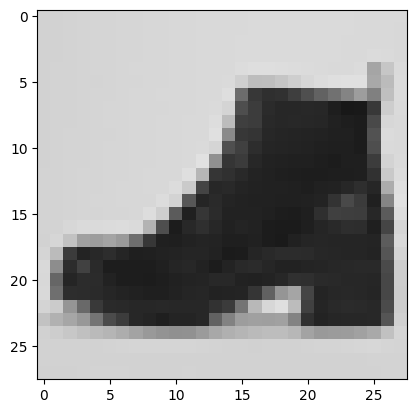

In [ ]:
# 이미지 보기
plt.imshow(img)
plt.show()

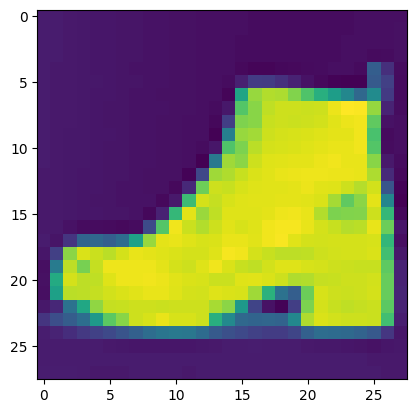

In [ ]:
# 이미지 반전
img = 255-img

plt.imshow(img)
plt.show()

In [ ]:
# 이미지 전처리 (차원 변환)
img = img.reshape(1,28,28,1)
img

array([[[[ 45],
         [ 45],
         [ 44],
         [ 43],
         [ 42],
         [ 42],
         [ 41],
         [ 41],
         [ 40],
         [ 40],
         [ 39],
         [ 39],
         [ 38],
         [ 38],
         [ 38],
         [ 38],
         [ 37],
         [ 37],
         [ 37],
         [ 37],
         [ 37],
         [ 37],
         [ 37],
         [ 37],
         [ 38],
         [ 38],
         [ 38],
         [ 38]],

        [[ 45],
         [ 45],
         [ 44],
         [ 43],
         [ 42],
         [ 42],
         [ 41],
         [ 41],
         [ 40],
         [ 40],
         [ 39],
         [ 39],
         [ 38],
         [ 38],
         [ 38],
         [ 38],
         [ 37],
         [ 37],
         [ 37],
         [ 37],
         [ 37],
         [ 37],
         [ 37],
         [ 37],
         [ 38],
         [ 38],
         [ 38],
         [ 39]],

        [[ 45],
         [ 45],
         [ 44],
         [ 43],
         [ 42],
         [ 42],
    

In [ ]:
# 이미지 정규화
img = img/255.0

In [ ]:
# keras로 저장한 모델 로딩할 때 오류가 있으면 새로운 버전을 설치한다!
pip install keras==3.0.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 997.1/997.1 kB 36.8 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.10.0
    Uninstalling keras-3.10.0:
      Successfully uninstalled keras-3.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
keras-hub 0.21.1 requires keras>=3.5, but you have keras 3.0.0 which is incompatible.
tensorflow 2.19.0 requires keras>=3.5.0, but you have keras 3.0.0 which is incompatible.


In [ ]:
from keras.models import load_model

new_model = load_model('/content/test_save.keras', compile=False)

TypeError: <class 'keras.src.models.sequential.Sequential'> could not be deserialized properly. Please ensure that components that are Python object instances (layers, models, etc.) returned by `get_config()` are explicitly deserialized in the model's `from_config()` method.

config={'module': 'keras', 'class_name': 'Sequential', 'config': {'name': 'sequential_1', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 2491853784176}, 'layers': [{'module': 'keras.layers', 'class_name': 'InputLayer', 'config': {'batch_shape': [None, 28, 28, 1], 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'input_layer_1', 'optional': False}, 'registered_name': None}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'conv2d_3', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'filters': 32, 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 28, 28, 1]}}, {'module': 'keras.layers', 'class_name': 'LeakyReLU', 'config': {'name': 'leaky_re_lu_4', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 2491853784176}, 'negative_slope': 0.1}, 'registered_name': None}, {'module': 'keras.layers', 'class_name': 'MaxPooling2D', 'config': {'name': 'max_pooling2d_3', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 2491853784176}, 'pool_size': [2, 2], 'padding': 'same', 'strides': [2, 2], 'data_format': 'channels_last'}, 'registered_name': None}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'conv2d_4', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 2491853784176}, 'filters': 64, 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 14, 14, 32]}}, {'module': 'keras.layers', 'class_name': 'LeakyReLU', 'config': {'name': 'leaky_re_lu_5', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 2491853784176}, 'negative_slope': 0.1}, 'registered_name': None}, {'module': 'keras.layers', 'class_name': 'MaxPooling2D', 'config': {'name': 'max_pooling2d_4', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 2491853784176}, 'pool_size': [2, 2], 'padding': 'same', 'strides': [2, 2], 'data_format': 'channels_last'}, 'registered_name': None}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'conv2d_5', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 2491853784176}, 'filters': 128, 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 7, 7, 64]}}, {'module': 'keras.layers', 'class_name': 'LeakyReLU', 'config': {'name': 'leaky_re_lu_6', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 2491853784176}, 'negative_slope': 0.1}, 'registered_name': None}, {'module': 'keras.layers', 'class_name': 'MaxPooling2D', 'config': {'name': 'max_pooling2d_5', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 2491853784176}, 'pool_size': [2, 2], 'padding': 'same', 'strides': [2, 2], 'data_format': 'channels_last'}, 'registered_name': None}, {'module': 'keras.layers', 'class_name': 'Flatten', 'config': {'name': 'flatten_1', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 2491853784176}, 'data_format': 'channels_last'}, 'registered_name': None, 'build_config': {'input_shape': [None, 4, 4, 128]}}, {'module': 'keras.layers', 'class_name': 'Dense', 'config': {'name': 'dense_2', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 2491853784176}, 'units': 128, 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None, 'quantization_config': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 2048]}}, {'module': 'keras.layers', 'class_name': 'LeakyReLU', 'config': {'name': 'leaky_re_lu_7', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 2491853784176}, 'negative_slope': 0.1}, 'registered_name': None}, {'module': 'keras.layers', 'class_name': 'Dense', 'config': {'name': 'dense_3', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 2491853784176}, 'units': 10, 'activation': 'softmax', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None, 'quantization_config': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 128]}}], 'build_input_shape': [None, 28, 28, 1]}, 'registered_name': None, 'build_config': {'input_shape': [None, 28, 28, 1]}, 'compile_config': None}.

Exception encountered: <class 'keras.src.layers.core.dense.Dense'> could not be deserialized properly. Please ensure that components that are Python object instances (layers, models, etc.) returned by `get_config()` are explicitly deserialized in the model's `from_config()` method.

config={'module': 'keras.layers', 'class_name': 'Dense', 'config': {'name': 'dense_2', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 2491853784176}, 'units': 128, 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None, 'quantization_config': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 2048]}}.

Exception encountered: Error when deserializing class 'Dense' using config={'name': 'dense_2', 'trainable': True, 'dtype': 'float32', 'units': 128, 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None, 'quantization_config': None}.

Exception encountered: Unrecognized keyword arguments passed to Dense: {'quantization_config': None}

In [ ]:

# 라벨이블 저장
label_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]

In [ ]:
# 테스트 데이터로 예측
label_names[np.argmax(model.predict(img), axis=1)[0]]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


'Ankle boot'

# CIFAR 예제

In [ ]:
# CIFAR-10 데이터 불러오기
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


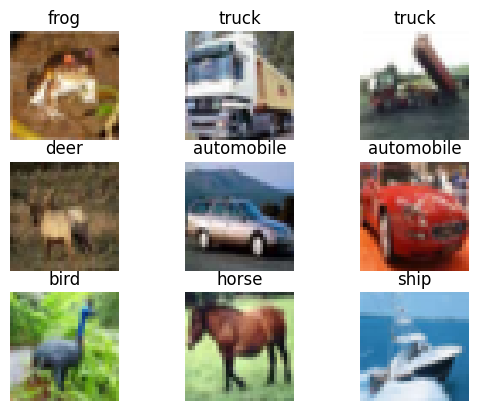

In [ ]:
# 데이터 사이즈 확인
x_train.shape, y_train.shape, x_test.shape, y_test.shape

# 훈련데이터 이미지 시각화
import matplotlib.pyplot as plt
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')
plt.show()

In [ ]:
# 정규화
x_train = x_train / 255.0
x_test = x_test / 255.0

# VGG 1 Block Model

In [ ]:
# 모델 생성
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,060,138 (4.04 MB)

 Trainable params: 1,060,138 (4.04 MB)

 Non-trainable params: 0 (0.00 B)

# VGG 2 Blocks Moldel

In [ ]:
# 모델 생성
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model2.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model2.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Flatten())
model2.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model2.add(Dense(10, activation='softmax'))
model2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 591,274 (2.26 MB)

 Trainable params: 591,274 (2.26 MB)

 Non-trainable params: 0 (0.00 B)

# 3 VGG Blocks Model

In [ ]:
# 모델 생성
model3 = Sequential()
model3.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model3.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model3.add(MaxPooling2D((2, 2)))
model3.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model3.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model3.add(MaxPooling2D((2, 2)))
model3.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model3.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model3.add(MaxPooling2D((2, 2)))
model3.add(Flatten())
model3.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model3.add(Dense(10, activation='softmax'))
model3.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 550,570 (2.10 MB)

 Trainable params: 550,570 (2.10 MB)

 Non-trainable params: 0 (0.00 B)

# 3 VGG Blocks with Dropout

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

# 모델 생성
model4 = Sequential()
model4.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model4.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model4.add(MaxPooling2D((2, 2)))
model4.add(Dropout(0.2))
model4.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model4.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model4.add(MaxPooling2D((2, 2)))
model4.add(Dropout(0.2))
model4.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model4.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model4.add(MaxPooling2D((2, 2)))
model4.add(Dropout(0.2))
model4.add(Flatten())
model4.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model4.add(Dropout(0.2))
model4.add(Dense(10, activation='softmax'))
model4.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_17 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 550,570 (2.10 MB)

 Trainable params: 550,570 (2.10 MB)

 Non-trainable params: 0 (0.00 B)

# 3 VGG Blocks with Weight Regularization

In [ ]:
# 모델 생성
from tensorflow.keras.regularizers import l2

model5 = Sequential()
model5.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001), input_shape=(32, 32, 3)))
model5.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
model5.add(MaxPooling2D((2, 2)))
model5.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
model5.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
model5.add(MaxPooling2D((2, 2)))
model5.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
model5.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
model5.add(MaxPooling2D((2, 2)))
model5.add(Flatten())
model5.add(Dense(128, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.001)))
model5.add(Dense(10, activation='softmax'))

# 3 VGG Blocks with Dropout and Batch Normalization

In [ ]:
# 모델 생성
from keras.layers import BatchNormalization

model10 = Sequential()
model10.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model10.add(BatchNormalization())
model10.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model10.add(BatchNormalization())
model10.add(MaxPooling2D((2, 2)))
model10.add(Dropout(0.2))
model10.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model10.add(BatchNormalization())
model10.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model10.add(BatchNormalization())
model10.add(MaxPooling2D((2, 2)))
model10.add(Dropout(0.3))
model10.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model10.add(BatchNormalization())
model10.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model10.add(BatchNormalization())
model10.add(MaxPooling2D((2, 2)))
model10.add(Dropout(0.4))
model10.add(Flatten())
model10.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model10.add(BatchNormalization())
model10.add(Dropout(0.5))
model10.add(Dense(10, activation='softmax'))
model10.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_29 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 552,874 (2.11 MB)

 Trainable params: 551,722 (2.10 MB)

 Non-trainable params: 1,152 (4.50 KB)

In [ ]:
# y_train 그대로 사용
print(y_train.shape)  # (60000,)

# 모델 컴파일
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


(50000, 1)


In [ ]:
# 체크포인트, 조기종료 설정
from keras.callbacks import ModelCheckpoint, EarlyStopping
earlystopping = EarlyStopping(monitor='val_accuracy', patience=5) # 5번의 에포크 동안 정확도에  개선이 없을 경우 학습을 멈추도록 설정
# 모델 학습
history = model.fit(x_train, y_train, epochs=100, batch_size=64, validation_data=(x_test, y_test), verbose=1, callbacks=[earlystopping])

Epoch 1/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 143s 181ms/step - accuracy: 0.2646 - loss: 2.0178 - val_accuracy: 0.3980 - val_loss: 1.7069
Epoch 2/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 134s 170ms/step - accuracy: 0.4134 - loss: 1.6514 - val_accuracy: 0.4217 - val_loss: 1.6406
Epoch 3/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 142s 170ms/step - accuracy: 0.4596 - loss: 1.5215 - val_accuracy: 0.4615 - val_loss: 1.5182
Epoch 4/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 128s 164ms/step - accuracy: 0.4895 - loss: 1.4450 - val_accuracy: 0.4983 - val_loss: 1.3930
Epoch 5/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 134s 171ms/step - accuracy: 0.5232 - loss: 1.3553 - val_accuracy: 0.5098 - val_loss: 1.3608
Epoch 6/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 130s 166ms/step - accuracy: 0.5420 - loss: 1.2913 - val_accuracy: 0.5365 - val_loss: 1.2950
Epoch 7/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 127s 162ms/step - accuracy: 0.5677 - loss: 1.2280 - val_accuracy: 0.5496 - val_loss: 1.2675
Epoch 8/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 132s 168ms/step - accuracy: 